### Data Pre-processing

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from arch import arch_model
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
df = pd.read_excel('marketdata.xlsx')
df = df.set_index('Date')
df.dropna(inplace=True)
df.index = pd.to_datetime(df.index)

In [9]:
df['cov_cases'] = df['covid'].diff().fillna(0)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 595 entries, 2020-01-31 to 2022-06-29
Data columns (total 44 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV_m          595 non-null    float64
 1   d_oil         595 non-null    float64
 2   d_ex          595 non-null    float64
 3   i             595 non-null    float64
 4   d_gold        595 non-null    int64  
 5   DSI           595 non-null    float64
 6   covid         595 non-null    int64  
 7   cov_DSI       595 non-null    float64
 8   r_wsale       595 non-null    float64
 9   r_retail      595 non-null    float64
 10  r_gas         595 non-null    float64
 11  r_indsmanu    595 non-null    float64
 12  r_agri        595 non-null    float64
 13  r_finan       595 non-null    float64
 14  r_estate      595 non-null    float64
 15  li_wsale      595 non-null    float64
 16  li_retail     595 non-null    float64
 17  li_gas        595 non-null    float64
 18  li_indsmanu

In [22]:
df.describe()

,TV_m,d_oil,d_ex,i,d_gold,DSI,covid,cov_DSI,r_wsale,r_retail,...,me_finan,me_estate,mtb_wsale,mtb_retail,mtb_gas,mtb_indsmanu,mtb_agri,mtb_finan,mtb_estate,cov_cases
count,595.000000,595.000000,595.000000,595.000000,5.950000e+02,595.000000,5.950000e+02,595.000000,595.000000,595.000000,...,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000
mean,20.107824,0.097311,-0.421849,3.382370,3.940336e+04,1.147435,1.628804e+06,0.256674,0.001279,0.001383,...,34.815101,34.661542,1.064532,1.692854,1.347782,1.494219,0.969931,1.427950,1.247827,18058.798319
std,0.455763,2.223257,21.013088,0.722366,4.892306e+05,1.743802,3.336683e+06,0.204848,0.016350,0.012506,...,0.324615,0.226119,0.310838,0.354877,0.254045,0.331003,0.204579,0.474924,0.376083,67803.725489
min,18.911961,-17.120001,-353.000000,1.210000,-4.110000e+06,-3.543543,2.000000e+00,0.002012,-0.071775,-0.044714,...,34.124590,34.110894,0.663613,1.053897,0.986725,0.891830,0.686548,0.684140,0.661402,0.000000
25%,19.771680,-0.700000,-2.500000,2.840000,-1.000000e+05,-0.248442,1.049000e+03,0.029169,-0.006015,-0.005934,...,34.493173,34.454410,0.780166,1.354418,1.183899,1.146881,0.808273,0.943033,0.897315,3.000000
50%,20.216869,0.170000,0.000000,3.340000,0.000000e+00,1.430255,2.733000e+03,0.251453,0.003543,0.002214,...,34.878129,34.709276,1.036371,1.714558,1.245967,1.613704,0.928585,1.373103,1.263391,35.000000
75%,20.438345,1.040000,3.000000,3.860000,1.500000e+05,2.445492,1.060358e+06,0.437529,0.011362,0.009418,...,35.103009,34.841154,1.309959,1.946674,1.464565,1.751762,1.093608,1.889890,1.490829,9397.500000
max,22.252831,9.560000,109.000000,5.350000,3.300000e+06,4.711640,1.074499e+07,0.631651,0.050327,0.037637,...,35.286754,35.053362,1.728830,2.466971,2.089940,1.984809,1.503235,2.387037,2.034904,852153.000000


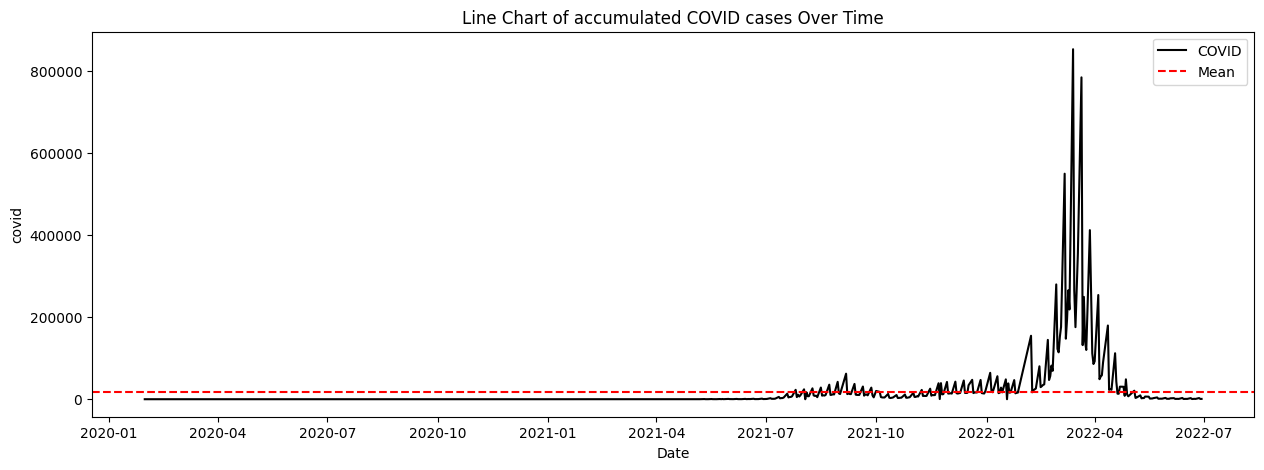

In [28]:
plt.figure(figsize=(15,5))
plt.plot(df.index, df['cov_cases'], color='black', label='COVID')
plt.axhline(df['cov_cases'].mean(), color='red', linestyle='--', label='Mean')
plt.xlabel('Date')
plt.ylabel('covid')
plt.title('Line Chart of accumulated COVID cases Over Time')
plt.legend()
plt.show()

### Porfolio 1 - Retail

                            OLS Regression Results                            
Dep. Variable:               r_retail   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.6387
Date:                Thu, 09 Oct 2025   Prob (F-statistic):              0.670
Time:                        11:39:39   Log-Likelihood:                 1764.9
No. Observations:                 595   AIC:                            -3518.
Df Residuals:                     589   BIC:                            -3491.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1315      0.209      0.629      0.5

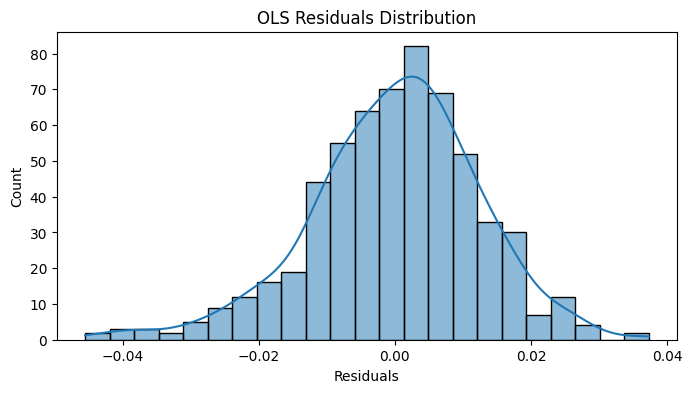

In [46]:
y = df['r_retail']
X = df[['cov_DSI', 'li_retail', 'tv_retail', 'me_retail', 'mtb_retail']]
X = sm.add_constant(X)  # Adds intercept

# Fit OLS model
ols_model = sm.OLS(y, X).fit()

# Print summary
print(ols_model.summary())

# Plot residuals distribution

plt.figure(figsize=(8,4))
sns.histplot(ols_model.resid, kde=True)
plt.title('OLS Residuals Distribution')
plt.xlabel('Residuals')
plt.show()

In [47]:
y = df['r_retail']
X = df[['cov_DSI', 'li_retail', 'tv_retail', 'me_retail', 'mtb_retail']]

In [48]:
garchx = arch_model(y, mean='ARX', lags=0, x=X, vol='Garch', p=1, q=1, dist='StudentsT')

res = garchx.fit(update_freq=5, disp='off')
print(res.summary())

c:\Users\tangc\AppData\Local\Programs\Python\Python313\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001553. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


                             AR-X - GARCH Model Results                             
Dep. Variable:                     r_retail   R-squared:               -10477406.932
Mean Model:                            AR-X   Adj. R-squared:          -10566349.275
Vol Model:                            GARCH   Log-Likelihood:               -4357.96
Distribution:      Standardized Student's t   AIC:                           8735.92
Method:                  Maximum Likelihood   BIC:                           8779.80
                                              No. Observations:                  595
Date:                      Thu, Oct 09 2025   Df Residuals:                      589
Time:                              11:39:48   Df Model:                            6
                                  Mean Model                                  
                 coef    std err          t      P>|t|        95.0% Conf. Int.
-----------------------------------------------------------------------------

c:\Users\tangc\AppData\Local\Programs\Python\Python313\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


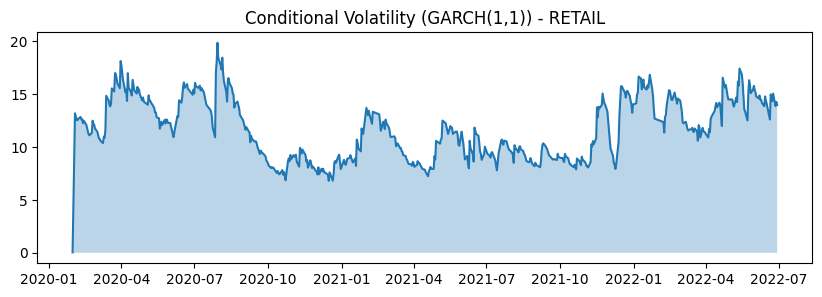

In [49]:
plt.figure(figsize=(10,3))
plt.plot(res.conditional_volatility)
plt.fill_between(df.index, res.conditional_volatility, alpha=0.3)
plt.title("Conditional Volatility (GARCH(1,1)) - RETAIL")
plt.show()

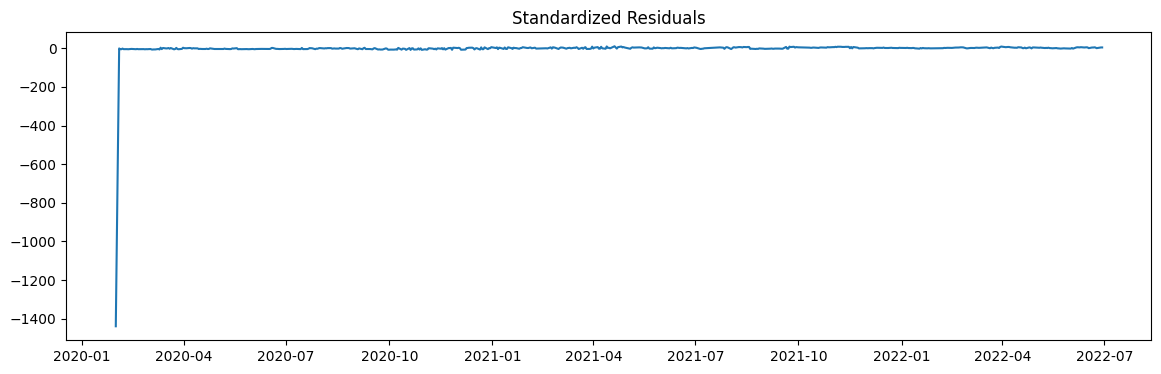

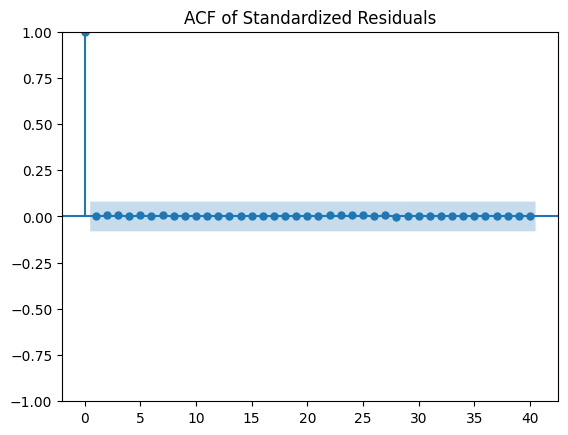

In [53]:
# Plot standardized residuals
plt.figure(figsize=(14,4))
plt.plot(res.std_resid)
plt.title('Standardized Residuals')
plt.show()

# Plot ACF of standardized residuals
plot_acf(res.std_resid, lags=40)
plt.title('ACF of Standardized Residuals')
plt.show()

In [54]:
from statsmodels.stats.diagnostic import acorr_ljungbox
lb_test = acorr_ljungbox(res.std_resid, lags=[10], return_df=True)
print(lb_test)

     lb_stat  lb_pvalue
10  0.142285        1.0


### Portfolio 2 - Finance

                            OLS Regression Results                            
Dep. Variable:                r_finan   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     3.389
Date:                Thu, 09 Oct 2025   Prob (F-statistic):            0.00501
Time:                        11:42:25   Log-Likelihood:                 1540.0
No. Observations:                 595   AIC:                            -3068.
Df Residuals:                     589   BIC:                            -3042.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1540      0.257      0.600      0.5

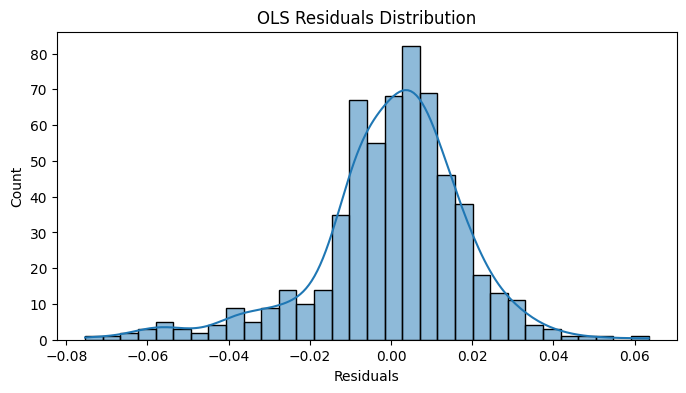

In [ ]:
y = df['r_finan']
X = df[['cov_DSI', 'li_finan', 'tv_finan', 'me_finan', 'mtb_finan']]
X = sm.add_constant(X)  # Adds intercept

# Fit OLS model
ols_model = sm.OLS(y, X).fit()

# Print summary
print(ols_model.summary())

# Plot residuals distribution
plt.figure(figsize=(8,4))
sns.histplot(ols_model.resid, kde=True)
plt.title('OLS Residuals Distribution')
plt.xlabel('Residuals')
plt.show()

In [56]:
y = df['r_finan']
X = df[['cov_DSI', 'li_finan', 'tv_finan', 'me_finan', 'mtb_finan']]

In [57]:
garchx = arch_model(y, mean='ARX', lags=0, x=X, vol='Garch', p=1, q=1, dist='StudentsT')

res = garchx.fit(update_freq=5, disp='off')
print(res.summary())

c:\Users\tangc\AppData\Local\Programs\Python\Python313\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003306. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


                             AR-X - GARCH Model Results                             
Dep. Variable:                      r_finan   R-squared:             -2190821958.014
Mean Model:                            AR-X   Adj. R-squared:        -2209419767.514
Vol Model:                            GARCH   Log-Likelihood:               -9152.85
Distribution:      Standardized Student's t   AIC:                           18325.7
Method:                  Maximum Likelihood   BIC:                           18369.6
                                              No. Observations:                  595
Date:                      Thu, Oct 09 2025   Df Residuals:                      589
Time:                              11:42:42   Df Model:                            6
                                  Mean Model                                  
                 coef    std err          t      P>|t|        95.0% Conf. Int.
-----------------------------------------------------------------------------

c:\Users\tangc\AppData\Local\Programs\Python\Python313\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


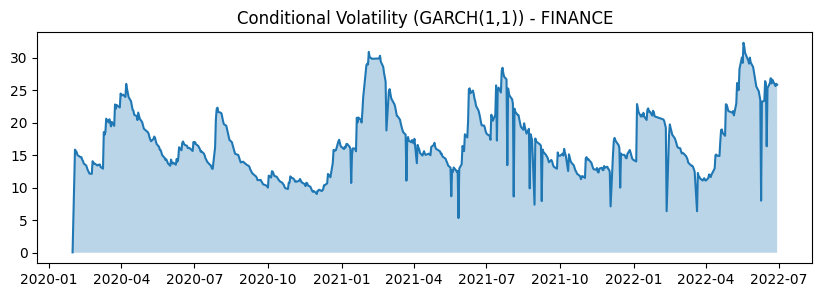

In [59]:
plt.figure(figsize=(10,3))
plt.plot(res.conditional_volatility)
plt.fill_between(df.index, res.conditional_volatility, alpha=0.3)
plt.title("Conditional Volatility (GARCH(1,1)) - FINANCE")
plt.show()

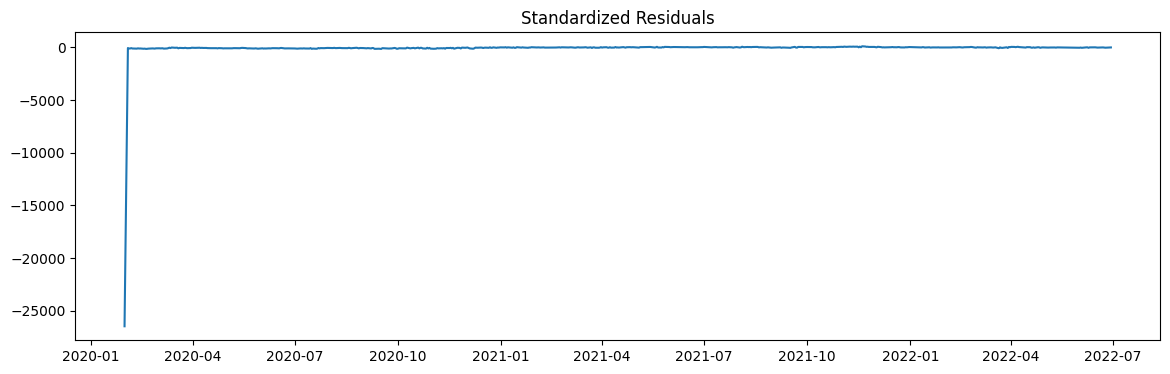

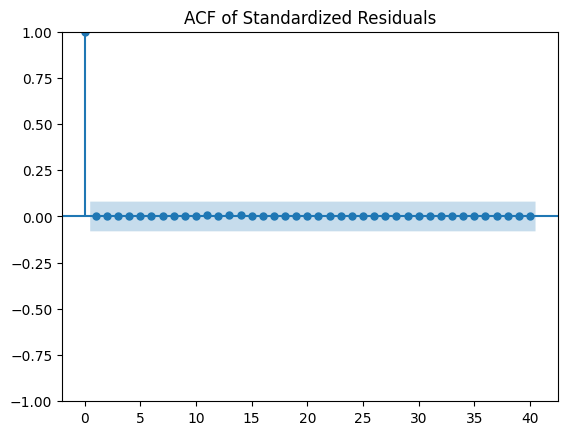

In [ ]:
plt.figure(figsize=(14,4))
plt.plot(res.std_resid)
plt.title('Standardized Residuals')
plt.show()

# Plot ACF of standardized residuals
plot_acf(res.std_resid, lags=40)
plt.title('ACF of Standardized Residuals')
plt.show()

In [62]:
from statsmodels.stats.diagnostic import acorr_ljungbox
lb_test = acorr_ljungbox(res.std_resid, lags=[10], return_df=True)
print(lb_test)

    lb_stat  lb_pvalue
10  0.12287        1.0


### Portfolio 3 - Whole sale

                            OLS Regression Results                            
Dep. Variable:                r_wsale   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.716
Date:                Thu, 09 Oct 2025   Prob (F-statistic):              0.129
Time:                        11:44:11   Log-Likelihood:                 1608.1
No. Observations:                 595   AIC:                            -3204.
Df Residuals:                     589   BIC:                            -3178.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3050      0.126      2.425      0.0

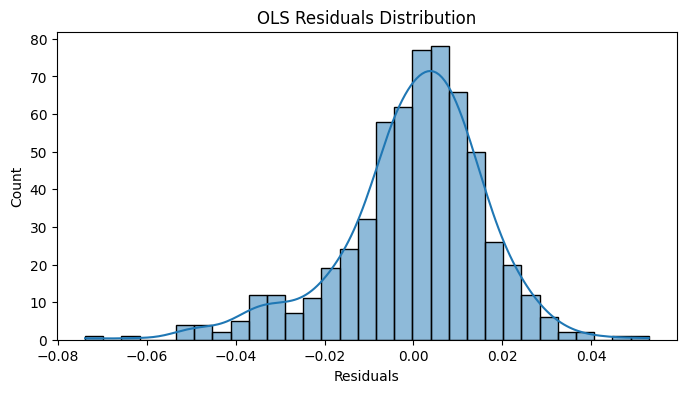

In [63]:
y = df['r_wsale']
X = df[['cov_DSI', 'li_wsale', 'tv_wsale', 'me_wsale', 'mtb_wsale']]
X = sm.add_constant(X)  # Adds intercept

# Fit OLS model
ols_model = sm.OLS(y, X).fit()

# Print summary
print(ols_model.summary())

# Plot residuals distribution

plt.figure(figsize=(8,4))
sns.histplot(ols_model.resid, kde=True)
plt.title('OLS Residuals Distribution')
plt.xlabel('Residuals')
plt.show()

In [82]:
y = df['r_wsale']
X = df[['cov_DSI', 'li_wsale', 'tv_wsale', 'me_wsale', 'mtb_wsale']]

In [86]:
garchx = arch_model(y, mean='ARX', lags=0, x=X, vol='Garch', p=1, q=1, dist='StudentsT')

res = garchx.fit(update_freq=5, disp='off')
print(res.summary())

c:\Users\tangc\AppData\Local\Programs\Python\Python313\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002631. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


                             AR-X - GARCH Model Results                             
Dep. Variable:                      r_wsale   R-squared:              -177942990.792
Mean Model:                            AR-X   Adj. R-squared:         -179453542.505
Vol Model:                            GARCH   Log-Likelihood:               -7277.12
Distribution:      Standardized Student's t   AIC:                           14574.2
Method:                  Maximum Likelihood   BIC:                           14618.1
                                              No. Observations:                  595
Date:                      Thu, Oct 09 2025   Df Residuals:                      589
Time:                              11:49:13   Df Model:                            6
                                  Mean Model                                  
                 coef    std err          t      P>|t|        95.0% Conf. Int.
-----------------------------------------------------------------------------

c:\Users\tangc\AppData\Local\Programs\Python\Python313\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


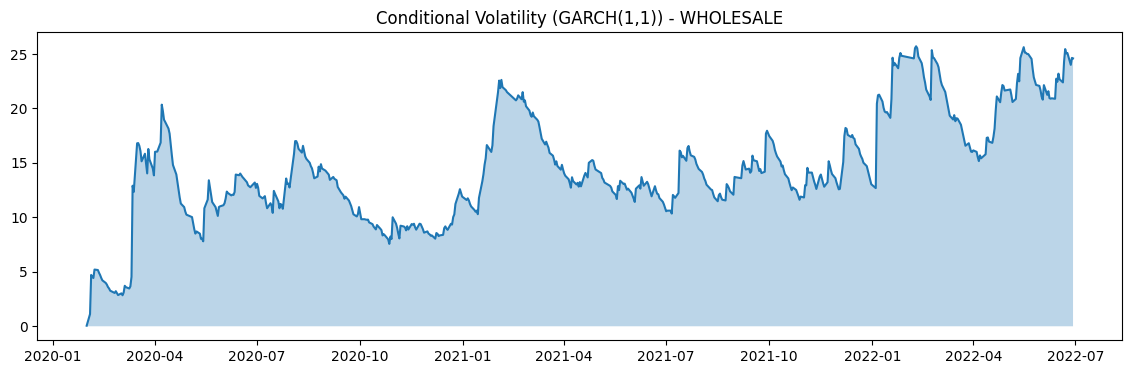

In [67]:
plt.figure(figsize=(14,4))
plt.plot(res.conditional_volatility)
plt.fill_between(df.index, res.conditional_volatility, alpha=0.3)
plt.title("Conditional Volatility (GARCH(1,1)) - WHOLESALE")
plt.show()

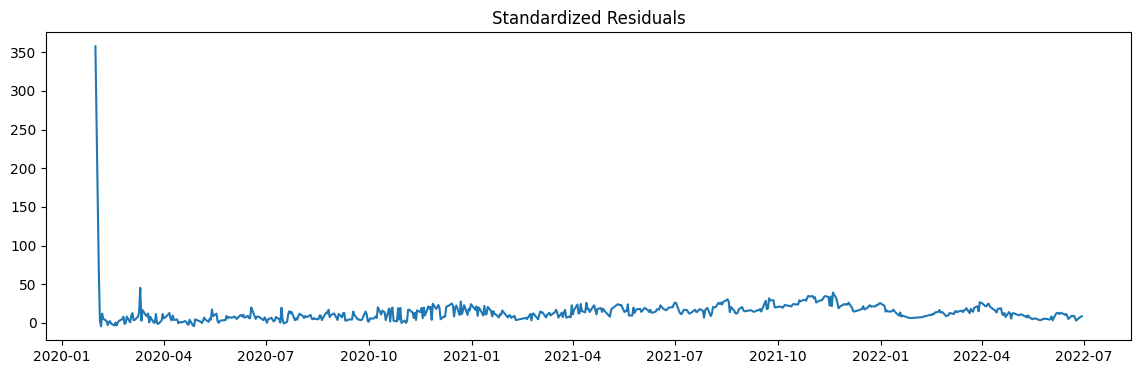

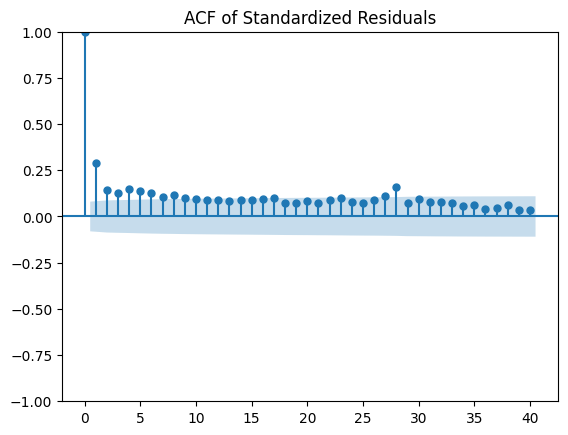

In [ ]:
plt.figure(figsize=(14,4))
plt.plot(res.std_resid)
plt.title('Standardized Residuals')
plt.show()

# Plot ACF of standardized residuals
plot_acf(res.std_resid, lags=40)
plt.title('ACF of Standardized Residuals')
plt.show()

In [69]:
from statsmodels.stats.diagnostic import acorr_ljungbox
lb_test = acorr_ljungbox(res.std_resid, lags=[10], return_df=True)
print(lb_test)

       lb_stat     lb_pvalue
10  133.749859  8.012904e-24


### Portfolio 4 - Real Estate

                            OLS Regression Results                            
Dep. Variable:               r_estate   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.6277
Date:                Thu, 09 Oct 2025   Prob (F-statistic):              0.679
Time:                        11:46:01   Log-Likelihood:                 1645.8
No. Observations:                 595   AIC:                            -3280.
Df Residuals:                     589   BIC:                            -3253.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3795      0.394      0.963      0.3

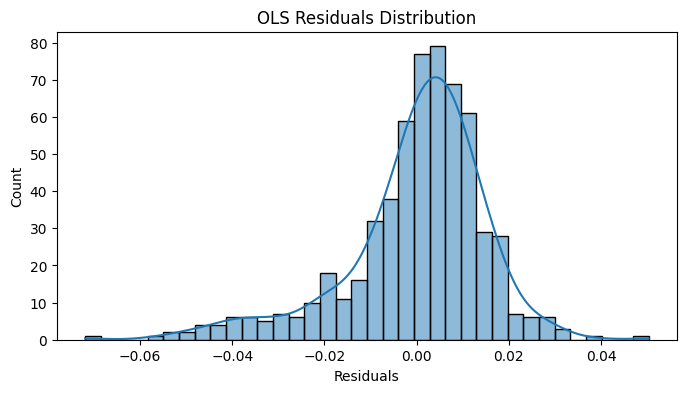

In [70]:
y = df['r_estate']
X = df[['cov_DSI', 'li_estate', 'tv_estate', 'me_estate', 'mtb_estate']]
X = sm.add_constant(X)  # Adds intercept

# Fit OLS model
ols_model = sm.OLS(y, X).fit()

# Print summary
print(ols_model.summary())

# Plot residuals distribution

plt.figure(figsize=(8,4))
sns.histplot(ols_model.resid, kde=True)
plt.title('OLS Residuals Distribution')
plt.xlabel('Residuals')
plt.show()

In [87]:
y = df['r_estate']
X = df[['cov_DSI', 'li_estate', 'tv_estate', 'me_estate', 'mtb_estate']]

In [88]:
garchx = arch_model(y, mean='ARX', lags=0, x=X, vol='Garch', p=1, q=1, dist='StudentsT')

res = garchx.fit(update_freq=5, disp='off')
print(res.summary())

c:\Users\tangc\AppData\Local\Programs\Python\Python313\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002317. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


                             AR-X - GARCH Model Results                             
Dep. Variable:                     r_estate   R-squared:              -291679867.711
Mean Model:                            AR-X   Adj. R-squared:         -294155927.717
Vol Model:                            GARCH   Log-Likelihood:               -7492.58
Distribution:      Standardized Student's t   AIC:                           15005.2
Method:                  Maximum Likelihood   BIC:                           15049.0
                                              No. Observations:                  595
Date:                      Thu, Oct 09 2025   Df Residuals:                      589
Time:                              11:53:04   Df Model:                            6
                                  Mean Model                                  
                 coef    std err          t      P>|t|        95.0% Conf. Int.
-----------------------------------------------------------------------------

c:\Users\tangc\AppData\Local\Programs\Python\Python313\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


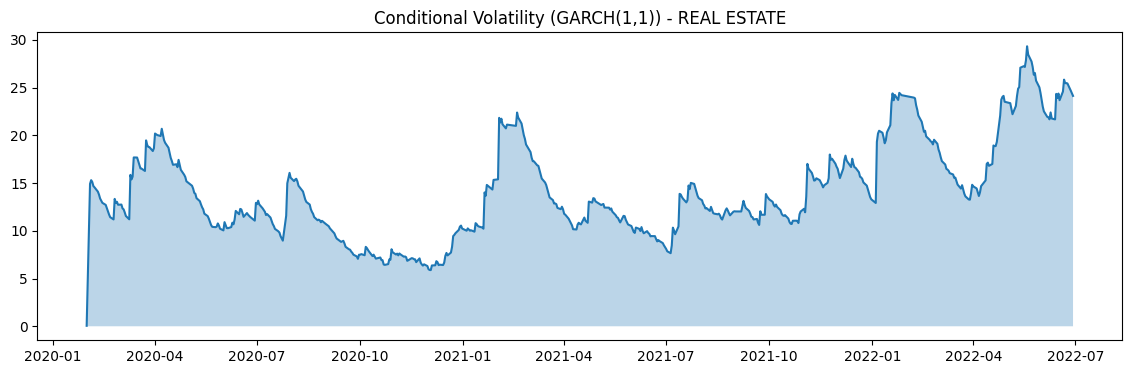

In [89]:
plt.figure(figsize=(14,4))
plt.plot(res.conditional_volatility)
plt.fill_between(df.index, res.conditional_volatility, alpha=0.3)
plt.title("Conditional Volatility (GARCH(1,1)) - REAL ESTATE")
plt.show()

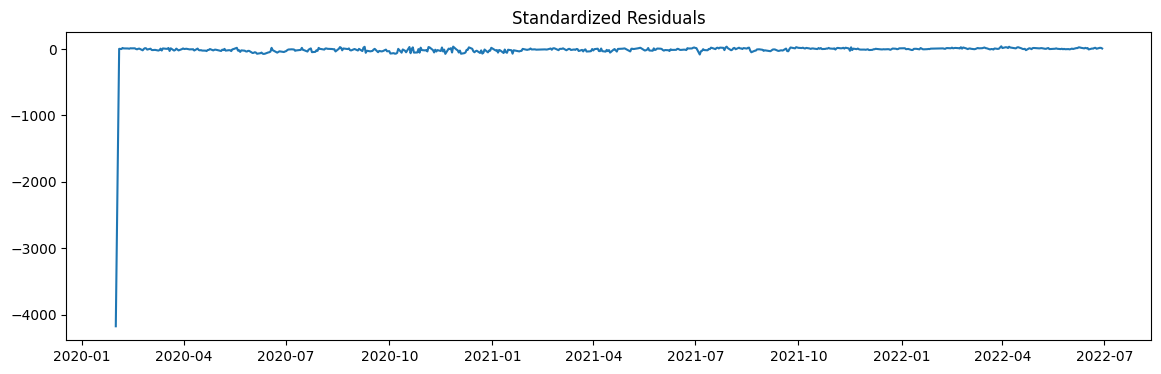

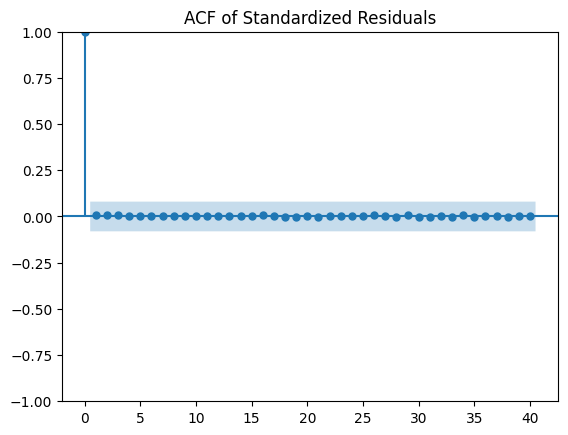

In [92]:
plt.figure(figsize=(14,4))
plt.plot(res.std_resid)
plt.title('Standardized Residuals')
plt.show()

# Plot ACF of standardized residuals
plot_acf(res.std_resid, lags=40)
plt.title('ACF of Standardized Residuals')
plt.show()

In [93]:
from statsmodels.stats.diagnostic import acorr_ljungbox
lb_test = acorr_ljungbox(res.std_resid, lags=[10], return_df=True)
print(lb_test)

     lb_stat  lb_pvalue
10  0.077945        1.0


### Portfolio 5 - Gas

                            OLS Regression Results                            
Dep. Variable:                  r_gas   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.001
Date:                Thu, 09 Oct 2025   Prob (F-statistic):             0.0768
Time:                        11:55:13   Log-Likelihood:                 1487.6
No. Observations:                 595   AIC:                            -2963.
Df Residuals:                     589   BIC:                            -2937.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2687      1.098     -2.067      0.0

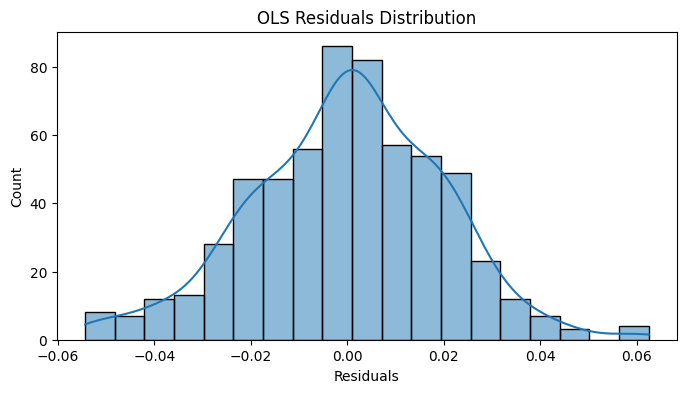

In [94]:
y = df['r_gas']
X = df[['cov_DSI', 'li_gas', 'tv_gas', 'me_gas', 'mtb_gas']]
X = sm.add_constant(X)  # Adds intercept

# Fit OLS model
ols_model = sm.OLS(y, X).fit()

# Print summary
print(ols_model.summary())

# Plot residuals distribution

plt.figure(figsize=(8,4))
sns.histplot(ols_model.resid, kde=True)
plt.title('OLS Residuals Distribution')
plt.xlabel('Residuals')
plt.show()

In [95]:
y = df['r_gas']
X = df[['cov_DSI', 'li_gas', 'tv_gas', 'me_gas', 'mtb_gas']]

In [96]:
garchx = arch_model(y, mean='ARX', lags=0, x=X, vol='Garch', p=1, q=1, dist='StudentsT')

res = garchx.fit(update_freq=5, disp='off')
print(res.summary())

c:\Users\tangc\AppData\Local\Programs\Python\Python313\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003943. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


                             AR-X - GARCH Model Results                             
Dep. Variable:                        r_gas   R-squared:                    -152.619
Mean Model:                            AR-X   Adj. R-squared:               -153.923
Vol Model:                            GARCH   Log-Likelihood:               -11.5515
Distribution:      Standardized Student's t   AIC:                           43.1030
Method:                  Maximum Likelihood   BIC:                           86.9886
                                              No. Observations:                  595
Date:                      Thu, Oct 09 2025   Df Residuals:                      589
Time:                              11:55:32   Df Model:                            6
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
Cons

c:\Users\tangc\AppData\Local\Programs\Python\Python313\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


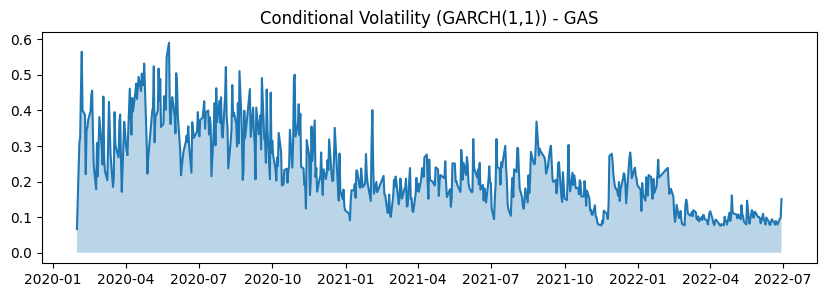

In [98]:
plt.figure(figsize=(10,3))
plt.plot(res.conditional_volatility)
plt.fill_between(df.index, res.conditional_volatility, alpha=0.3)
plt.title("Conditional Volatility (GARCH(1,1)) - GAS")
plt.show()

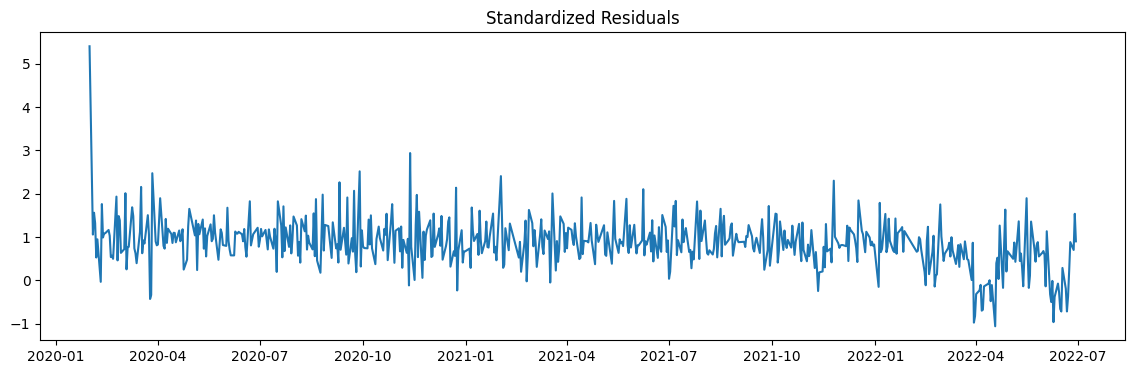

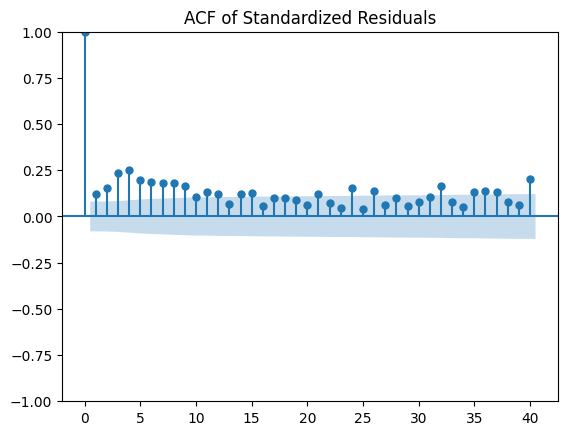

In [99]:
plt.figure(figsize=(14,4))
plt.plot(res.std_resid)
plt.title('Standardized Residuals')
plt.show()

# Plot ACF of standardized residuals
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(res.std_resid, lags=40)
plt.title('ACF of Standardized Residuals')
plt.show()

In [100]:
from statsmodels.stats.diagnostic import acorr_ljungbox
lb_test = acorr_ljungbox(res.std_resid, lags=[10], return_df=True)
print(lb_test)

       lb_stat     lb_pvalue
10  200.997859  9.994481e-38


### Portfolio 6 - Manufacturing

                            OLS Regression Results                            
Dep. Variable:             r_indsmanu   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     6.657
Date:                Thu, 09 Oct 2025   Prob (F-statistic):           4.82e-06
Time:                        11:56:22   Log-Likelihood:                 1829.4
No. Observations:                 595   AIC:                            -3647.
Df Residuals:                     589   BIC:                            -3620.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4254      0.182     -2.336   

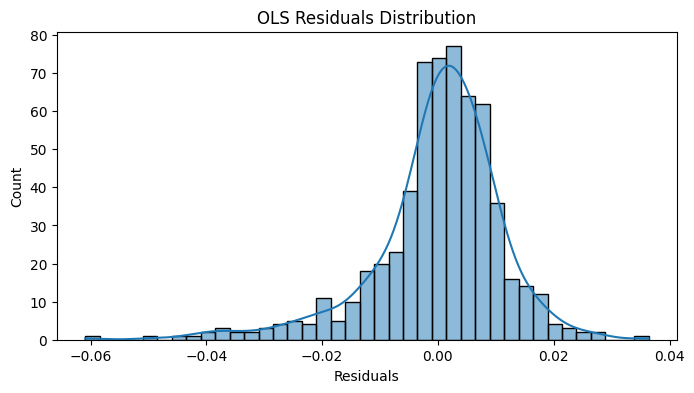

In [101]:
y = df['r_indsmanu']
X = df[['cov_DSI', 'li_indsmanu', 'tv_indsmanu', 'me_indsmanu', 'mtb_indsmanu']]
X = sm.add_constant(X)  # Adds intercept

# Fit OLS model
ols_model = sm.OLS(y, X).fit()

# Print summary
print(ols_model.summary())

# Plot residuals distribution

plt.figure(figsize=(8,4))
sns.histplot(ols_model.resid, kde=True)
plt.title('OLS Residuals Distribution')
plt.xlabel('Residuals')
plt.show()

In [102]:
y = df['r_indsmanu']
X = df[['cov_DSI', 'li_indsmanu', 'tv_indsmanu', 'me_indsmanu', 'mtb_indsmanu']]

In [103]:
garchx = arch_model(y, mean='ARX', lags=0, x=X, vol='Garch', p=1, q=1, dist='StudentsT')

res = garchx.fit(update_freq=5, disp='off')
print(res.summary())

c:\Users\tangc\AppData\Local\Programs\Python\Python313\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000125. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


                             AR-X - GARCH Model Results                             
Dep. Variable:                   r_indsmanu   R-squared:             -1782741557.227
Mean Model:                            AR-X   Adj. R-squared:        -1797875186.753
Vol Model:                            GARCH   Log-Likelihood:               -9899.30
Distribution:      Standardized Student's t   AIC:                           19818.6
Method:                  Maximum Likelihood   BIC:                           19862.5
                                              No. Observations:                  595
Date:                      Thu, Oct 09 2025   Df Residuals:                      589
Time:                              11:56:31   Df Model:                            6
                                   Mean Model                                   
                   coef    std err          t      P>|t|        95.0% Conf. Int.
-------------------------------------------------------------------------

c:\Users\tangc\AppData\Local\Programs\Python\Python313\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


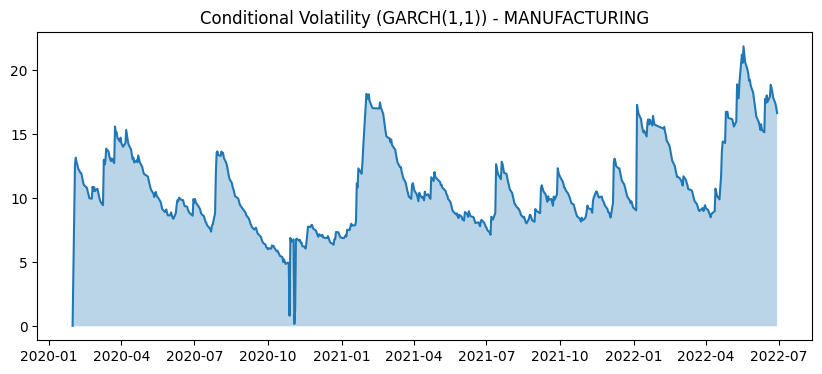

In [104]:
plt.figure(figsize=(10,4))
plt.plot(res.conditional_volatility)
plt.fill_between(df.index, res.conditional_volatility, alpha=0.3)
plt.title("Conditional Volatility (GARCH(1,1)) - MANUFACTURING")
plt.show()

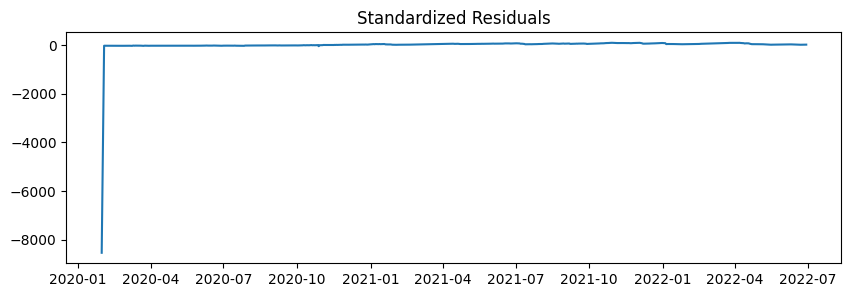

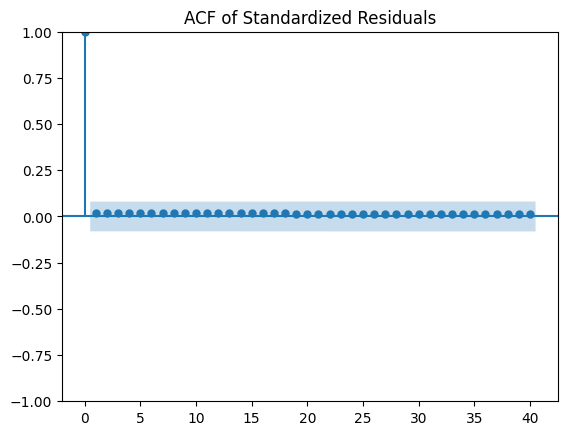

In [105]:
plt.figure(figsize=(10,3))
plt.plot(res.std_resid)
plt.title('Standardized Residuals')
plt.show()

# Plot ACF of standardized residuals
plot_acf(res.std_resid, lags=40)
plt.title('ACF of Standardized Residuals')
plt.show()

In [106]:
from statsmodels.stats.diagnostic import acorr_ljungbox
lb_test = acorr_ljungbox(res.std_resid, lags=[10], return_df=True)
print(lb_test)

     lb_stat  lb_pvalue
10  1.752231   0.997911
